<b>Avocado dataset</b>


Avacado is a fruit consumed by people heavily in United states. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation<br>
AveragePrice - the average price of a single avocado<br>
type - conventional or organic<br>
year - the year<br>
Region - the city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>


Task: Classification /Regression

Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Regression

<b>Importing Necessary Libraries</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
# Reading the data
ava=pd.read_csv("avocado.csv")
ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Removing the unnecessary attributes
ava.drop(["Unnamed: 0"],axis=1,inplace=True)
ava.drop(["region"],axis=1,inplace=True)

In [5]:
ava.shape

(18249, 12)

<b>Observation:</b>
There are 18249 rows and 12 columns.

For analysis, we are converting attribute into date format.

In [6]:
ava['Date']=pd.to_datetime(ava['Date'])

<b>Converting the Date column into int dtype in the format DDMMYYY</b>

In [7]:
ava['Date']=ava['Date'].apply(lambda x: x.strftime('%d%m%Y'))
ava['Date']=ava["Date"].astype(int)

In [8]:
ava.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
dtype: object

<b>Observation:</b>
There are 12 columns in the dataset, out of which 9 attributes are of float datatype and 2 attributes are of int datatype.

<b>Checking Missing Value</b>

In [285]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
Date            18249 non-null int32
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


In [286]:
ava.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64

<b>Observation:</b>
There is no missing values in the dataset.

<b>Summary Statistics</b>

In [287]:
ava.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1.824900e+04,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.572640e+07,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,8.776728e+06,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,1.012017e+06,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,8.052016e+06,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.604202e+07,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,2.310202e+07,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.112202e+07,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<b>Exploratory Data Analysis</b>

<b>Uni-Variate Analysis</b>

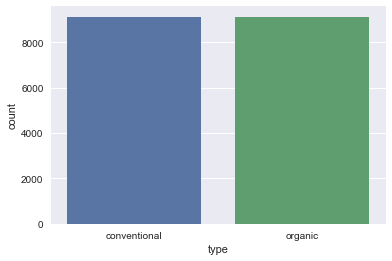

In [229]:
sns.countplot("type",data=ava)
plt.show()

<b>Observation:</b>
Almost conventional and organic types are equal.

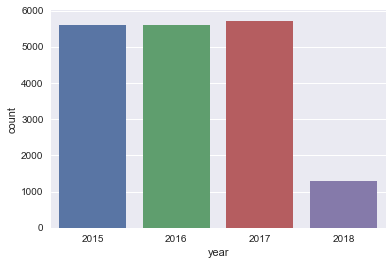

In [230]:
sns.countplot("year",data=ava)
plt.show()

<b>Observation:</b>
We see that there are less avacado in 2018.

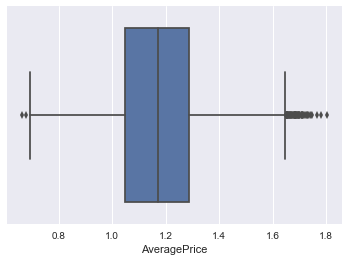

In [162]:
sns.boxplot(ava["AveragePrice"])

<b>Observation:</b>
From the above visualization, we can see that there is an outlier above 1.7

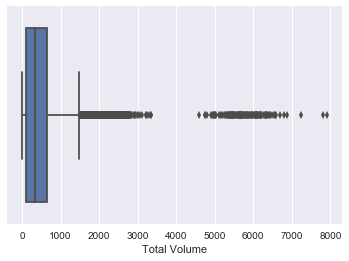

In [163]:
sns.boxplot(ava["Total Volume"])

<b>Observation:</b>
From the above visualization, there is an outlier above 15000

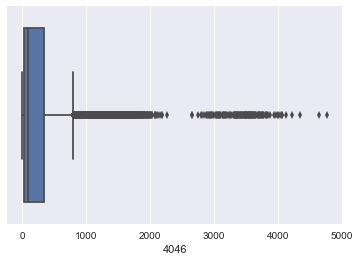

In [165]:
sns.boxplot(ava["4046"])
plt.show()

<b>Observation:</b>
There is an outlier above 800.

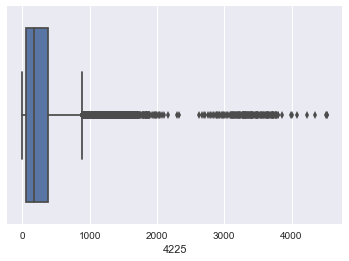

In [166]:
sns.boxplot(ava["4225"])
plt.show()

<b>Observation:</b>
From the above visualization, there is an outlier above 800.

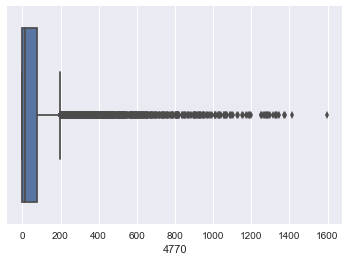

In [167]:
sns.boxplot(ava["4770"])
plt.show()

<b>Observation:</b>
There is an outlier above 200.

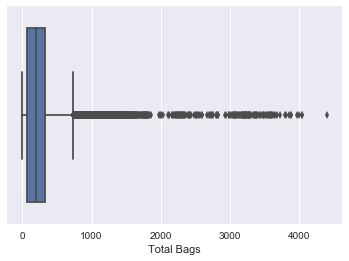

In [168]:
sns.boxplot(ava["Total Bags"])

<b>Observation:</b>
There is an outlier above 800.

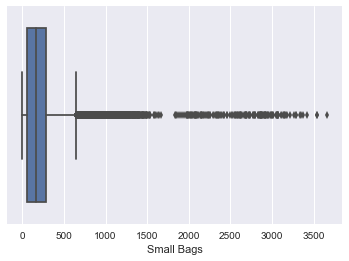

In [169]:
sns.boxplot(ava["Small Bags"])

<b>Observation:</b>
There is an outlier above 600.

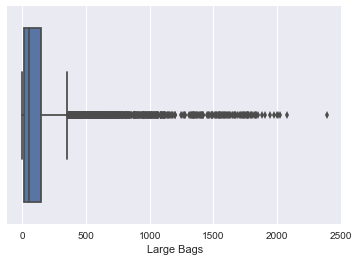

In [171]:
sns.boxplot(ava["Large Bags"])

<b>Observation:</b>
There is an outlier above 300.

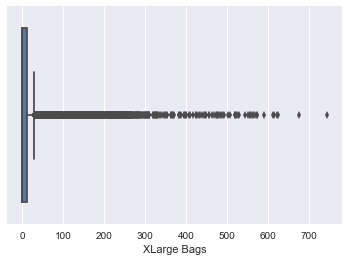

In [173]:
sns.boxplot(ava["XLarge Bags"])

<b>Observation:</b>
There is an outlier above 10.

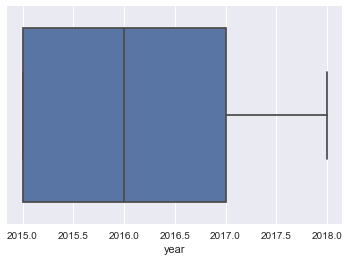

In [175]:
sns.boxplot(ava["year"])

<b>Observation:</b>
From the above visualization, there is no outlier.

<b>Bi-Variate Analysis</b>

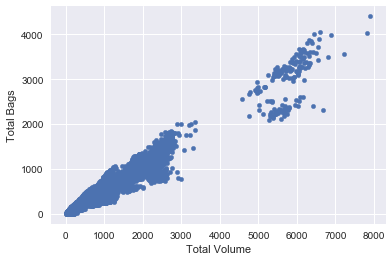

In [99]:
ava.plot(kind="scatter",x="Total Volume", y="Total Bags")
plt.show()

There is positive linear association between Total Volume and Total Bags.

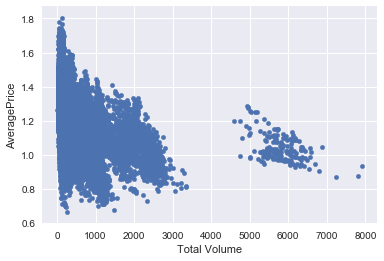

In [113]:
ava.plot(kind="scatter",x="Total Volume",y="AveragePrice")
plt.show()

There is no association between Total Volume and AveragePrice.

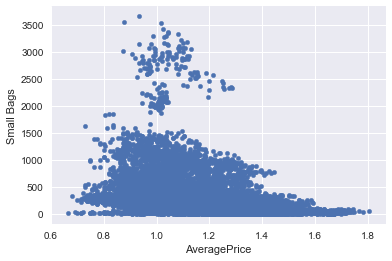

In [126]:
ava.plot(kind="scatter",x="AveragePrice",y="Small Bags")
plt.show()

There is nonlinear association between AveragePrice and Small bags.

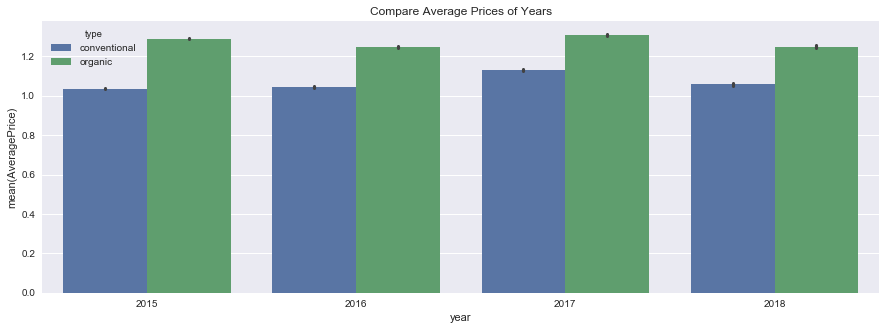

In [125]:
f,ax=plt.subplots(figsize=(15,5))
sns.barplot(x="year",y="AveragePrice",hue="type",data=ava)
plt.title("Compare Average Prices of Years")

In 2017, conventional and organic avacado types are more as compare to rest of years.

<b>Multi-Variate Analysis</b>

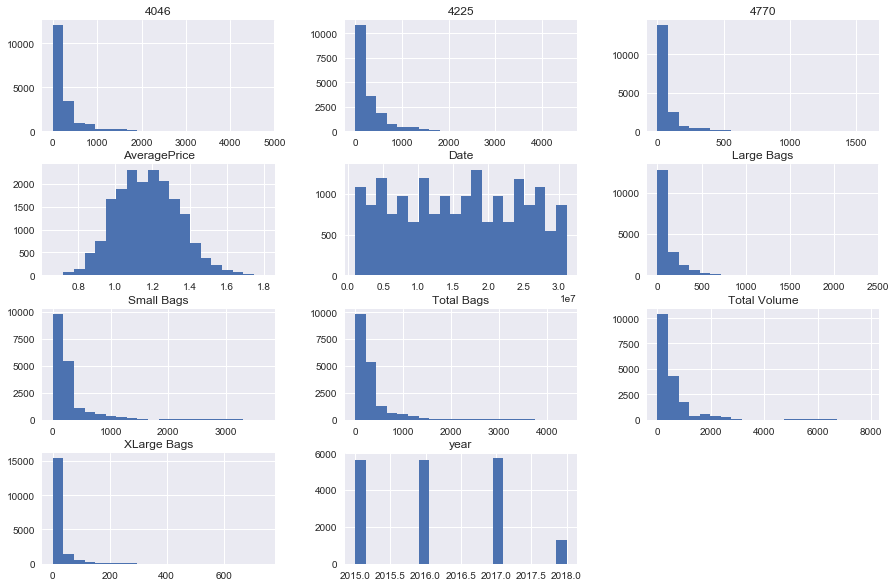

In [96]:
ava.hist(figsize=(15,10),grid=True,bins=20);

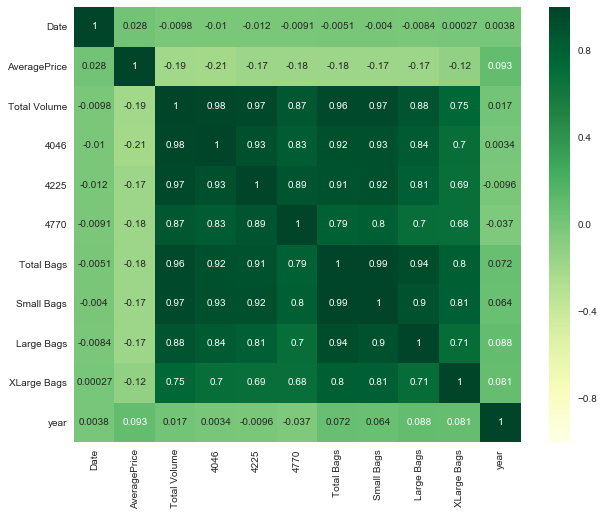

In [231]:
heatmap=ava.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heatmap, cmap="YlGn",annot=True)
plt.show()

<b>Observation:</b>
<li>There is multicollinearity between 4046,4225, Total Bags, Small Bags with Total Volume. So we can remove 4225 and Total Bags from the dataset.</li>

In [9]:
import warnings
warnings.filterwarnings("ignore")
ava.drop(["4046", "Small Bags"],axis=1,inplace=True)

<b>Label Encoder</b>

In [10]:
# Lets convert the variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
ava["type"]=LE.fit_transform(ava["type"])

<b>Checking Skewness</b>

In [11]:
ava.skew(axis=0)

Date             0.014391
AveragePrice     0.580303
Total Volume     9.007687
4225             8.942466
4770            10.159396
Total Bags       9.756072
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

In [12]:
# Treating the skewness in the dataset
import warnings
warnings.filterwarnings("ignore")
for index in ava.skew().index:
    if ava.skew().loc[index]>0.5:
        ava[index]=np.sqrt(ava[index])

In [13]:
ava.skew(axis=0)

Date            0.014391
AveragePrice    0.196766
Total Volume    3.986597
4225            3.896355
4770            4.128605
Total Bags      4.128864
Large Bags      4.134963
XLarge Bags     4.827368
type            0.000329
year            0.215339
dtype: float64

<b>Checking Outliers</b>

In [14]:
from scipy.stats import zscore
z_score=abs(zscore(ava))
print("The shape of dataset before removing outliers",ava.shape)
ava=ava.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",ava.shape)

The shape of dataset before removing outliers (18249, 10)
The shape of dataset after removing outliers (17319, 10)


<b>Dividing the input and output variables</b>

In [184]:
X= ava.drop(["AveragePrice"],axis=1)
y= ava["AveragePrice"]

<b>Standarization</b>

In [185]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into train and test</b>

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [187]:
# We are using R2 score to evaluate
def mx_r2_score(cr,X,y):
    mx_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        cr.fit(X_train,y_train)
        y_pred= cr.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>mx_r2_score:
            mx_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((mx_r2_score),3))

# Machine Learning Models:

As the target variable is continuous (AveragePrice), its regression Problem.  We are using Linear Regression, Random Forest Regressor, KNN Regressor, XG Boost Regressor and Gradient Boosting Regressor.

<b>Linear Regression</b>

In [191]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linreg= GridSearchCV(Linreg,parameters, cv=5)
Linreg.fit(X,y)
Linreg.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [192]:
Linreg=LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
mx_r2_score(Linreg,X,y)

Maximum R2_Score corresponding: 71  and it is : 0.481


In [193]:
pred_linreg= Linreg.predict(X_test)
l_r1= Linreg.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((l_r1),3))

The accuracy of the Linear Regression Model is: 0.475


In [195]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_linreg=cross_val_score(Linreg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Linear Regression:",m_linreg)
std_linreg=cross_val_score(Linreg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Linear Regression:",std_linreg)

Mean R2 Score for Linear Regression: 0.07809065925649757
Standard Deviation in R2 Score for Linear Regression: 0.12775466099593366


In [196]:
# RMSE
from sklearn import metrics
lin_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_linreg))
lin_rmse

0.1224139191294398

<b>Random Forest Regressor</b>

In [197]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
rf= GridSearchCV(rf, param_grid,cv=5)
rf.fit(X,y)
rf.best_params_

{'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [199]:
rf=RandomForestRegressor(max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=10,n_estimators=100)
mx_r2_score(rf,X,y)

Maximum R2_Score corresponding: 80  and it is : 0.767


In [200]:
pred_rf= rf.predict(X_test)
rf_1= rf.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((rf_1),3))

The accuracy of the Random Forest Regressor Model is: 0.83


In [202]:
# Cross validation score
from sklearn.model_selection import cross_val_score
mean_rfr=cross_val_score(rf,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",mean_rfr)
std_rfr=cross_val_score(rf,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_rfr)

Mean R2 Score for Random Forest Regressor: 0.3372083416947763
Standard Deviation in R2 Score for Random Forest Regression: 0.10015144821154387


In [203]:
# RMSE
from sklearn import metrics
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
rf_rmse

0.06963508829099015

<b>KNN Regressor</b>

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
parameters={"n_neighbors":range(2,30)}
knr= GridSearchCV(knn,parameters,cv=5)
knr.fit(X,y)
knr.best_params_

{'n_neighbors': 29}

In [205]:
knr= KNeighborsRegressor(n_neighbors=29)
mx_r2_score(knr,X,y)

Maximum R2_Score corresponding: 64  and it is : 0.621


In [206]:
pred_knn= knr.predict(X_test)
knn_1= knr.score(X_test, y_test)
print("The accuracy of the KNN Regressor Model is:",round((knn_1),3))

The accuracy of the KNN Regressor Model is: 0.629


In [208]:
# Cross validation score
mean_knn=cross_val_score(knr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for KNN Regressor:",mean_knn)
std_knn=cross_val_score(knr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for KNN Regression:",std_knn)

Mean R2 Score for KNN Regressor: 0.17876137119967223
Standard Deviation in R2 Score for KNN Regression: 0.14010995074023747


In [207]:
from sklearn import metrics
knn_rm=np.sqrt(metrics.mean_squared_error(y_test,pred_knn))
knn_rm

0.10290619673131922

<b>XG Boost Regressor</b>

In [209]:
import xgboost as xgb
xg_reg= xgb.XGBRegressor(objective="reg:linear",silent=True)
xg_reg.fit(X,y)
mx_r2_score(xg_reg,X,y)

Maximum R2_Score corresponding: 61  and it is : 0.663


In [210]:
pred_x= xg_reg.predict(X_test)
xg_1= xg_reg.score(X_test, y_test)
print("The accuracy of the XG Boost Regressor Model is:",round((xg_1),3))

The accuracy of the XG Boost Regressor Model is: 0.66


In [211]:
# Cross validation score
from sklearn.model_selection import cross_val_score
mean_xg=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for XG Boost Regressor:",mean_xg)
std_xg=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for XG Boost Regressor:",std_xg)

Mean R2 Score for XG Boost Regressor: 0.3118191287289986
Standard Deviation in R2 Score for XG Boost Regressor: 0.0919134677964948


In [212]:
# RMSE
from sklearn import metrics
xg_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_x))
xg_rmse

0.09853191240497343

<b>Gradient Boosting Regressor</b>

In [213]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.02,0.09], 'subsample': [0.9, 0.5,0.6], 'n_estimators': [50,100,500], 'max_depth': [4,6,8]}
gb= GridSearchCV(estimator=gb, param_grid= parameters, cv=5, n_jobs=-1)
gb.fit(X,y)
gb.best_params_

{'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [214]:
gb = GradientBoostingRegressor(learning_rate=0.09,max_depth=4,n_estimators=500,subsample=0.5)
mx_r2_score(gb,X,y)

Maximum R2_Score corresponding: 72  and it is : 0.799


In [215]:
pred_gb= gb.predict(X_test)
gb_1= gb.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((gb_1),3))

The accuracy of the Gradient Boosting Regressor Model is: 0.842


In [216]:
# Cross validation score
from sklearn.model_selection import cross_val_score
mean_gb=cross_val_score(gb,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",mean_gb)
std_gb=cross_val_score(gb,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regression:",std_gb)

Mean R2 Score for Gradient Boosting Regressor: 0.4772436221715304
Standard Deviation in R2 Score for Gradient Boosting Regression: 0.12051844026238154


In [217]:
# RMSE
from sklearn import metrics
gbr_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_gb))
gbr_rmse

0.06718301633427981

In [228]:
#Lets initialise the data frame with columns model and f1_score
data= [["Linear Regresion",l_r1,m_linreg,std_linreg,lin_rmse], ["Random Forest Regressor",rf_1,mean_rfr,std_rfr,rf_rmse],["KNN Regressor",knn_1,mean_knn, std_knn,knn_rm],["XG Boost Regressor",xg_1,mean_xg,std_xg,xg_rmse],["Gradient Boosting Regressor",gb_1,mean_gb, std_gb,gbr_rmse]]
compare_results= pd.DataFrame(data, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score","RMSE"], index=[1,2,3,4,5])
compare_results

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score,RMSE
1,Linear Regresion,0.474866,0.078091,0.127755,0.122414
2,Random Forest Regressor,0.830072,0.337208,0.100151,0.069635
3,KNN Regressor,0.628899,0.178761,0.140110,0.102906
4,XG Boost Regressor,0.659778,0.311819,0.091913,0.098532
5,Gradient Boosting Regressor,0.841829,0.477244,0.120518,0.067183


<b>Observations:</b>
<li> As the target variable(W) is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above table, we can conclude that Gradient Boosting Regressor performed well with Lowest RMSE(0.06183).</li>

<b>Saving the Prediction</b>

As the Gradient Boosting Performed well, we are saving the prediction of this model.

In [301]:
np.savetxt('Model8_1.csv',pred_gb,delimiter=',')

In [302]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gb, 'Project8_1.pkl')

['Project8_1.pkl']

# Classification Task:

<b>Dividing the Input and Output variables</b>

In [15]:
X= ava.drop(["type"],axis=1)
y= ava["type"]

<b>Splitting into Training and Testing</b>

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [17]:
# We will use auc_roc score as the metrics 
from sklearn.metrics import roc_auc_score
def mx_auc_roc_score(m1,X,y):
    mx_auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        m1.fit(X_train,y_train)
        y_pred= m1.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>mx_auc_roc_score:
            mx_auc_roc_score=auc_roc
            a_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",a_score," and it is :",round((mx_auc_roc_score),2))

# Machine Learning Models:

As target variable(type) has binary class, its a Classification problem. We are using  Logistic Regression, KNN Classifier, Random Forest Classifier, SVM Classifier and Gradient Boosting Classifier.

<b>Logistic Regression</b>

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipeline= Pipeline([("scaler", StandardScaler()), ('Regression', LogisticRegression())])
pipeline.fit(X,y)
mx_auc_roc_score(pipeline,X,y)

Maximum AUC_ROC Score corresponding to: 66  and it is : 0.96


In [20]:
from sklearn.metrics import confusion_matrix
predlr= pipeline.predict(X_test)
l1= pipeline.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((l1),3))

The accuracy of the Logistic Model is: 0.951


In [21]:
print(confusion_matrix(y_test,predlr))

[[2329  156]
 [  99 2612]]


<b>Observations:</b>
<li> There are 2329 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 2612 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 156 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 99 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predlr))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95      2485
          1       0.94      0.96      0.95      2711

avg / total       0.95      0.95      0.95      5196



In [23]:
from sklearn.model_selection import cross_val_score
mean_lr_auc=cross_val_score(pipeline, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(pipeline, X,y,cv=5,scoring="roc_auc").mean())
std_l_auc= cross_val_score(pipeline, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Logistic Regression from mean AUC_ROC score is",cross_val_score(pipeline, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.986606979158706
standard deviation for Logistic Regression from mean AUC_ROC score is 0.00806088096335056


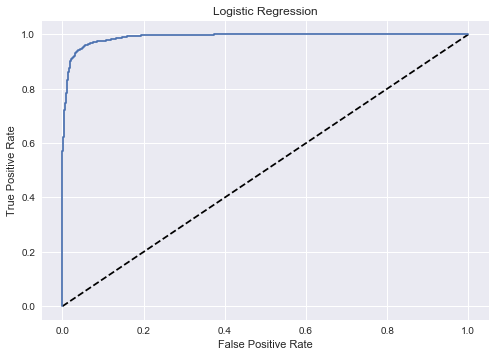

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= pipeline.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [25]:
auc_score1=roc_auc_score(y_test, pipeline.predict(X_test))
auc_score1

0.9503527249813896

<b>KNN Classifier</b>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,60)}
knn= GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
knn.fit(X,y)
knn.best_params_

{'n_neighbors': 14}

In [27]:
knn=KNeighborsClassifier(n_neighbors=14)
mx_auc_roc_score(knn,X,y)

Maximum AUC_ROC Score corresponding to: 42  and it is : 0.91


In [28]:
pred_knn= knn.predict(X_test)
k2= knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((k2),3))

The accuracy of the KNN Model is: 0.909


In [29]:
print(confusion_matrix(y_test,pred_knn))

[[2356  129]
 [ 342 2369]]


<b>Observations:</b>
<li> There are 2356 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 2369 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 129 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 342 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_knn))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91      2485
          1       0.95      0.87      0.91      2711

avg / total       0.91      0.91      0.91      5196



In [31]:
from sklearn.model_selection import cross_val_score
mean_knn_auc=cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knn, X,y,cv=5,scoring="roc_auc").mean())
std_knn_auc= cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN Classifier from mean AUC_ROC score is",cross_val_score(knn, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9585742239225805
standard deviation for KNN Classifier from mean AUC_ROC score is 0.028403815298171018


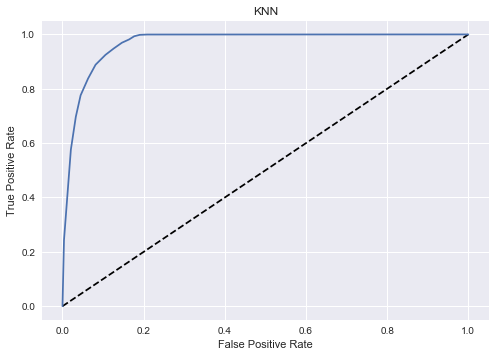

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= knn.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [33]:
auc_score2=roc_auc_score(y_test, knn.predict(X_test))
auc_score2

0.9109679100052176

<b>Gradient Boosting Classifier</b>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05], 'subsample': [0.1, 0.5,0.3], 'n_estimators': [10,50,100], 'max_depth': [2,4,8]}
gbc= GridSearchCV(estimator=gbc, param_grid= parameters, cv=5, n_jobs=-1)
gbc.fit(X,y)
gbc.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.3}

In [35]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_depth=8,n_estimators=100,subsample=0.3)
mx_auc_roc_score(gbc,X,y)

Maximum AUC_ROC Score corresponding to: 87  and it is : 0.99


In [36]:
pred_gbc= gbc.predict(X_test)
g2= gbc.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((g2),3))

The accuracy of the Grading Boosting Model is: 0.993


In [37]:
print(confusion_matrix(y_test,pred_gbc))

[[2474   11]
 [  23 2688]]


<b>Observations:</b>
<li> There are 2474 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 2688 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 11 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 23 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_gbc))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2485
          1       1.00      0.99      0.99      2711

avg / total       0.99      0.99      0.99      5196



In [39]:
from sklearn.model_selection import cross_val_score
m_gbc_auc=cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").mean())
m_sgbc_auc= cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(gbc, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9919961301451398
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.005660130947559537


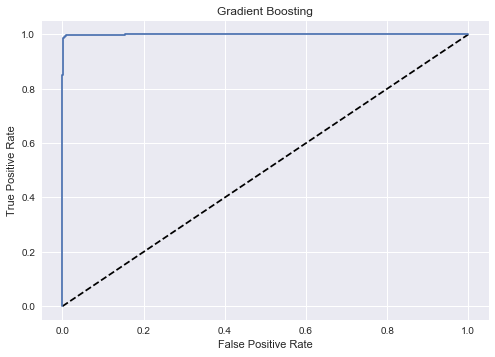

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gbc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [41]:
auc_score3=roc_auc_score(y_test, gbc.predict(X_test))
auc_score3

0.9935447431917214

<b>Random Forest Classifier</b>

In [43]:
from sklearn.ensemble import RandomForestClassifier
ran_forest= RandomForestClassifier()
parameters= {'n_estimators':[4,6,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[3,5,7]}
ran_forest= GridSearchCV(ran_forest,parameters)
ran_forest.fit(X,y)
ran_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 8}

In [44]:
ran_forest=RandomForestClassifier(criterion='entropy', max_depth=10,max_features='auto',min_samples_leaf=3,min_samples_split=5,n_estimators=8)
mx_auc_roc_score(ran_forest,X,y)

Maximum AUC_ROC Score corresponding to: 51  and it is : 0.99


In [45]:
pred_rf= ran_forest.predict(X_test)
rf2= ran_forest.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((rf2),3))

The accuracy of the Random Forest Classifier is: 0.99


In [46]:
print(confusion_matrix(y_test,pred_rf))

[[2465   20]
 [  30 2681]]


<b>Observations:</b>
<li> There are 2476 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 2650 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 23 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 47 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [426]:
print(classification_report(y_test,pred_rf))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      2499
          1       0.99      0.98      0.99      2697

avg / total       0.99      0.99      0.99      5196



In [47]:
from sklearn.model_selection import cross_val_score
mean_rf_auc=cross_val_score(ran_forest, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(ran_forest, X,y,cv=5,scoring="roc_auc").mean())
std_rf_auc= cross_val_score(ran_forest, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(ran_forest, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9900937741762001
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.009588913609106966


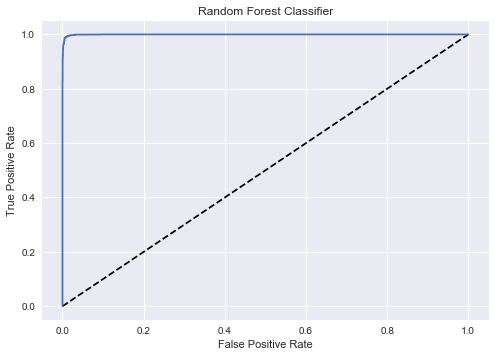

In [48]:
y_pred_prob= ran_forest.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [49]:
auc_score4=roc_auc_score(y_test, ran_forest.predict(X_test))
auc_score4

0.9904428414826844

# Evaluation:

In [50]:
#Lets initialise the data frame with columns model and f1_score
d= [["Logistic Regression", l1,mean_lr_auc,std_l_auc], ["KNN", k2, mean_knn_auc,std_knn_auc],["Gradient Boosting Classifier", g2,m_gbc_auc, m_sgbc_auc],["Random Forest Classifier",rf2,mean_rf_auc,std_rf_auc]]
comparsion= pd.DataFrame(d, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4])
comparsion

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.950924,0.986607,0.008061
2,KNN,0.909353,0.958574,0.028404
3,Gradient Boosting Classifier,0.993457,0.993418,0.005544
4,Random Forest Classifier,0.990377,0.988117,0.011088


<b>Observations:</b>
<li> From the above models, Gradient Boosting performed well with 99.34% accuracy.</li>
<li>As the data was imbalanced, we used AUC ROC for model evaluation and calculated Mean F1 Score and Standard Deviation mean F1 Score</li>

<b>Saving the Prediction:</b>

As the Gradient Boosting Classifier performed well, we are saving the prediction.

In [52]:
np.savetxt('Model8_2.csv',pred_gbc,delimiter=',')

In [53]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gbc, 'Project8_2.pkl')

['Project8_2.pkl']